In [1]:
import pandas as pd
import re
import os
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
import warnings
from tqdm import tqdm

In [2]:
#df_fn = pd.read_csv('Fakenews/train.csv')

In [3]:
df_fn2 = pd.read_csv('FakeNews2/train.csv')
df_fn2

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df_fn2.dropna(inplace=True)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), )
X = df_fn2['text']
y = df_fn2['label']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
X_train = vectorizer.fit_transform(X_train)

In [7]:
X_test = vectorizer.transform(X_test)

In [8]:
X_train.shape, X_test.shape

((13713, 2677790), (4572, 2677790))

In [9]:
etc = ExtraTreesClassifier()
forest = RandomForestClassifier(n_estimators=1000, n_jobs=20)
GBoost = GradientBoostingClassifier()

In [10]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=20, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [11]:
y_hat = forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2579
           1       0.97      0.82      0.89      1993

    accuracy                           0.91      4572
   macro avg       0.92      0.90      0.90      4572
weighted avg       0.91      0.91      0.91      4572

AxesSubplot(0.125,0.125;0.62x0.755)


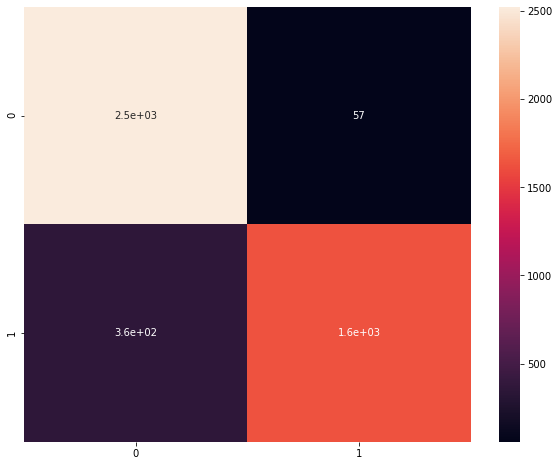

In [12]:
print(classification_report(y_test, y_hat))
plt.figure(figsize=(10,8))
print(sns.heatmap(confusion_matrix(y_test, y_hat), annot=True))

In [ ]:
#pd.DataFrame({'atributo':vectorizer.get_feature_names(), 'importancia':forest.feature_importances_}).sort_values('importancia', ascending = False)

In [ ]:
text = 'A talk radio host said he was fired from a rightwing radio station – mid-show – for criticizing Donald Trump. Craig Silverman was hosting his eponymous show on 710 KNUS, a Denver station owned by the conservative Salem Media Group, on Saturday when the station abruptly cut to a network news report. According to Silverman, the program director entered the studio and told him: “You’re done.” Silverman had been in the middle of a segment about Roy Cohn, Trump’s controversial former lawyer who died in 1986. Silverman, a rare critic of Trump on the conservative network, said he had run into problems with executives at the station due to his refusal to “toe strict Trump party line”. “I was frustrated that we couldn’t talk about the facts of the impeachment case and it all came to a head as I was excoriating Donald Trump on my show yesterday,” Silverman told CNN’s Reliable Sources on Sunday. On Sunday night, however, KNUS said Silverman was not fired – despite the station removing his page from its website – but was taken off air after he discussed a planned appearance on a rival network. “He decided that it was important to work across town and so on Saturday on his program he announced that, and that’s what prompted our decision to take him off the air,” station general manager Brian Taylor told the Denver Post.“The notion that he was relieved from his program because he criticized President Trump is absolutely untrue. We’ve never told Mr Silverman the position to take on [Trump’s] impeachment.” Speaking to CNN Business, Silverman outlined his position, discussing the witnesses who appeared in public hearings last week. “I thought [William] Taylor and [George] Kent were great,” he said, “they laid a base. I’m a trial attorney, I’m a former prosecutor. I know how to put on a case. As of Monday morning, he had not said whether he would return to his show. Taylor said: “I look forward to Craig continuing his program.”'
print(len(text), '\n' , text)

In [ ]:
forest.predict(vectorizer[text])

In [13]:
import os
import pickle
with open ('model.pkl', 'wb') as f:
    pickle.dump(forest, f)

In [14]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
ext = ExtraTreesClassifier(n_estimators=1000, n_jobs=20)
ext.fit(X_train, y_train)

In [ ]:
y_hat = ext.predict(X_test)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)
print(classification_report(y_test, y_hat))